In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
YEARS = range(2014,2019)
files = ['../data/'+str(x)+'_Financial_Data.csv' for x in YEARS]
dfs = [pd.read_csv(f) for f in files]

Text(0.5, 1.0, 'N. of samples per year')

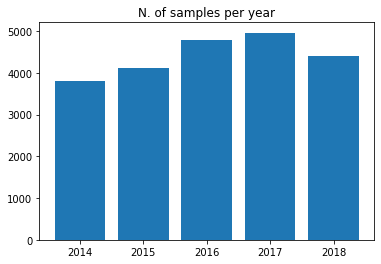

In [19]:
samples_per_year = [len(df) for df in dfs]
plt.bar(YEARS, samples_per_year)
plt.title("N. of samples per year")

In [20]:
total = None
for i, df in enumerate(dfs):
    price_var_column = dfs[i].columns[-2]
    renamed = {price_var_column: "PRICE VAR [%]", 'Unnamed: 0': 'Stock'}
    dfs[i] = dfs[i].rename(columns=renamed)
    dfs[i] = dfs[i].drop(['operatingCycle', 'cashConversionCycle'], axis=1)
    dfs[i]['Year'] = 2014+i
    if i == 0:
        total = dfs[0]
        continue
    else:
        total = total.append(dfs[i], ignore_index=True)
total

,Stock,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,PRICE VAR [%],Class,Year
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0,2014
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0,2014
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1,2014
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1,2014
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22072,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0,2018
22073,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0,2018
22074,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0,2018
22075,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0,2018


In [21]:
stats = {'mean': total.mean(), 'std': total.std(), 'nulls' : total.isnull().sum(axis=0) / 220}
stats = pd.DataFrame(stats).sort_values('nulls')
print(stats.to_string())

                                                    mean           std      nulls
Class                                       5.507542e-01  4.974286e-01   0.000000
Stock                                                NaN           NaN   0.000000
Sector                                               NaN           NaN   0.000000
PRICE VAR [%]                               2.698893e+02  1.934617e+04   0.000000
Year                                        2.016091e+03  1.374340e+00   0.000000
Financing Cash Flow                        -1.895271e+08  1.544010e+10   4.418182
Net cash flow / Change in cash              1.151322e+08  2.948614e+10   4.627273
Operating Income                            5.896979e+08  2.976454e+09   5.004545
Receivables                                 9.761184e+08  9.746252e+09   5.022727
Retained earnings (deficit)                 2.106631e+09  1.465196e+10   5.304545
Operating Cash Flow                         1.073239e+09  1.615091e+10   5.309091
Revenue         

17913      0
17859      0
7329       0
4251       0
7326       0
        ... 
11879    219
16213    219
16214    219
16181    219
11970    219
Length: 22077, dtype: int64

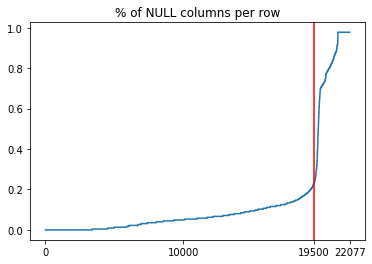

In [22]:
nulls_per_row = total.isnull().sum(axis=1).sort_values()
plt.plot(nulls_per_row.to_numpy() / len(total.columns))
plt.axvline(19500, color='red')
plt.xticks([0,10000,19500,len(total)])
plt.title('% of NULL columns per row')
nulls_per_row

In [23]:
# keep the 19500 firts rows
total.head(19500).to_csv('./data/Financial_Data.csv',index=False)